# 회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [3]:
df = pd.read_csv("부품수리시간.csv", engine = 'python')

In [4]:
df.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [5]:
df.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


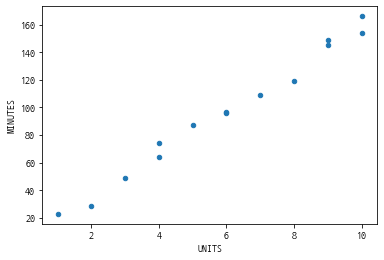

In [6]:
df.plot.scatter(x = 'UNITS', y = 'MINUTES')

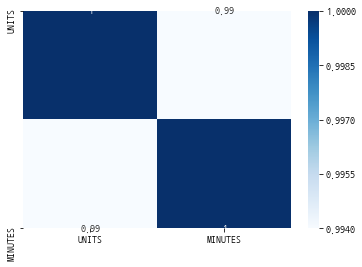

In [11]:
sns.heatmap(df.corr(method = 'pearson').round(3), annot = True, cmap = 'Blues')

In [12]:
reg_model = smf.ols(formula = "MINUTES~UNITS", data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           8.92e-13
Time:                        13:11:43   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


### 등분산성/ 독립성 검정

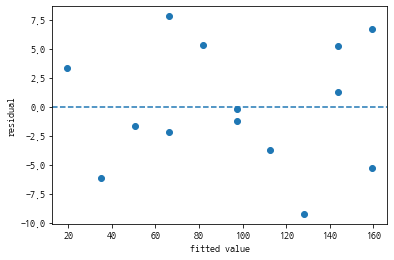

In [14]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value");plt.ylabel("residual")
plt.axhline(y = 0, linestyle="--")

### 정규성검정

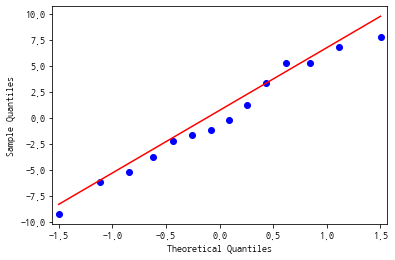

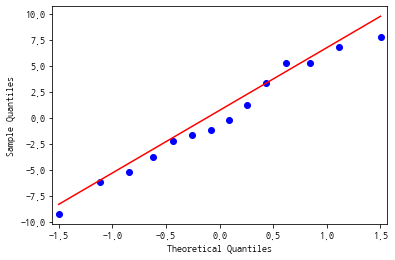

In [18]:
qqplot(reg_result.resid, line = "q")

In [17]:
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis = 0)

NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

# 다중회귀분석

In [22]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법(후진제거법)
from sklearn.feature_selection import RFE
#Scale 변환
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("체질검사.csv", engine = 'python')

In [23]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


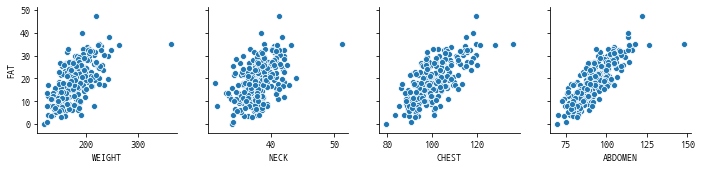

In [25]:
sns.pairplot(df, y_vars ="FAT", x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN'])

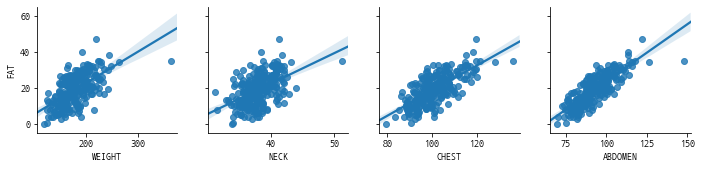

In [26]:
sns.pairplot(df, y_vars ="FAT", x_vars = ['WEIGHT','NECK','CHEST','ABDOMEN'], kind = "reg")

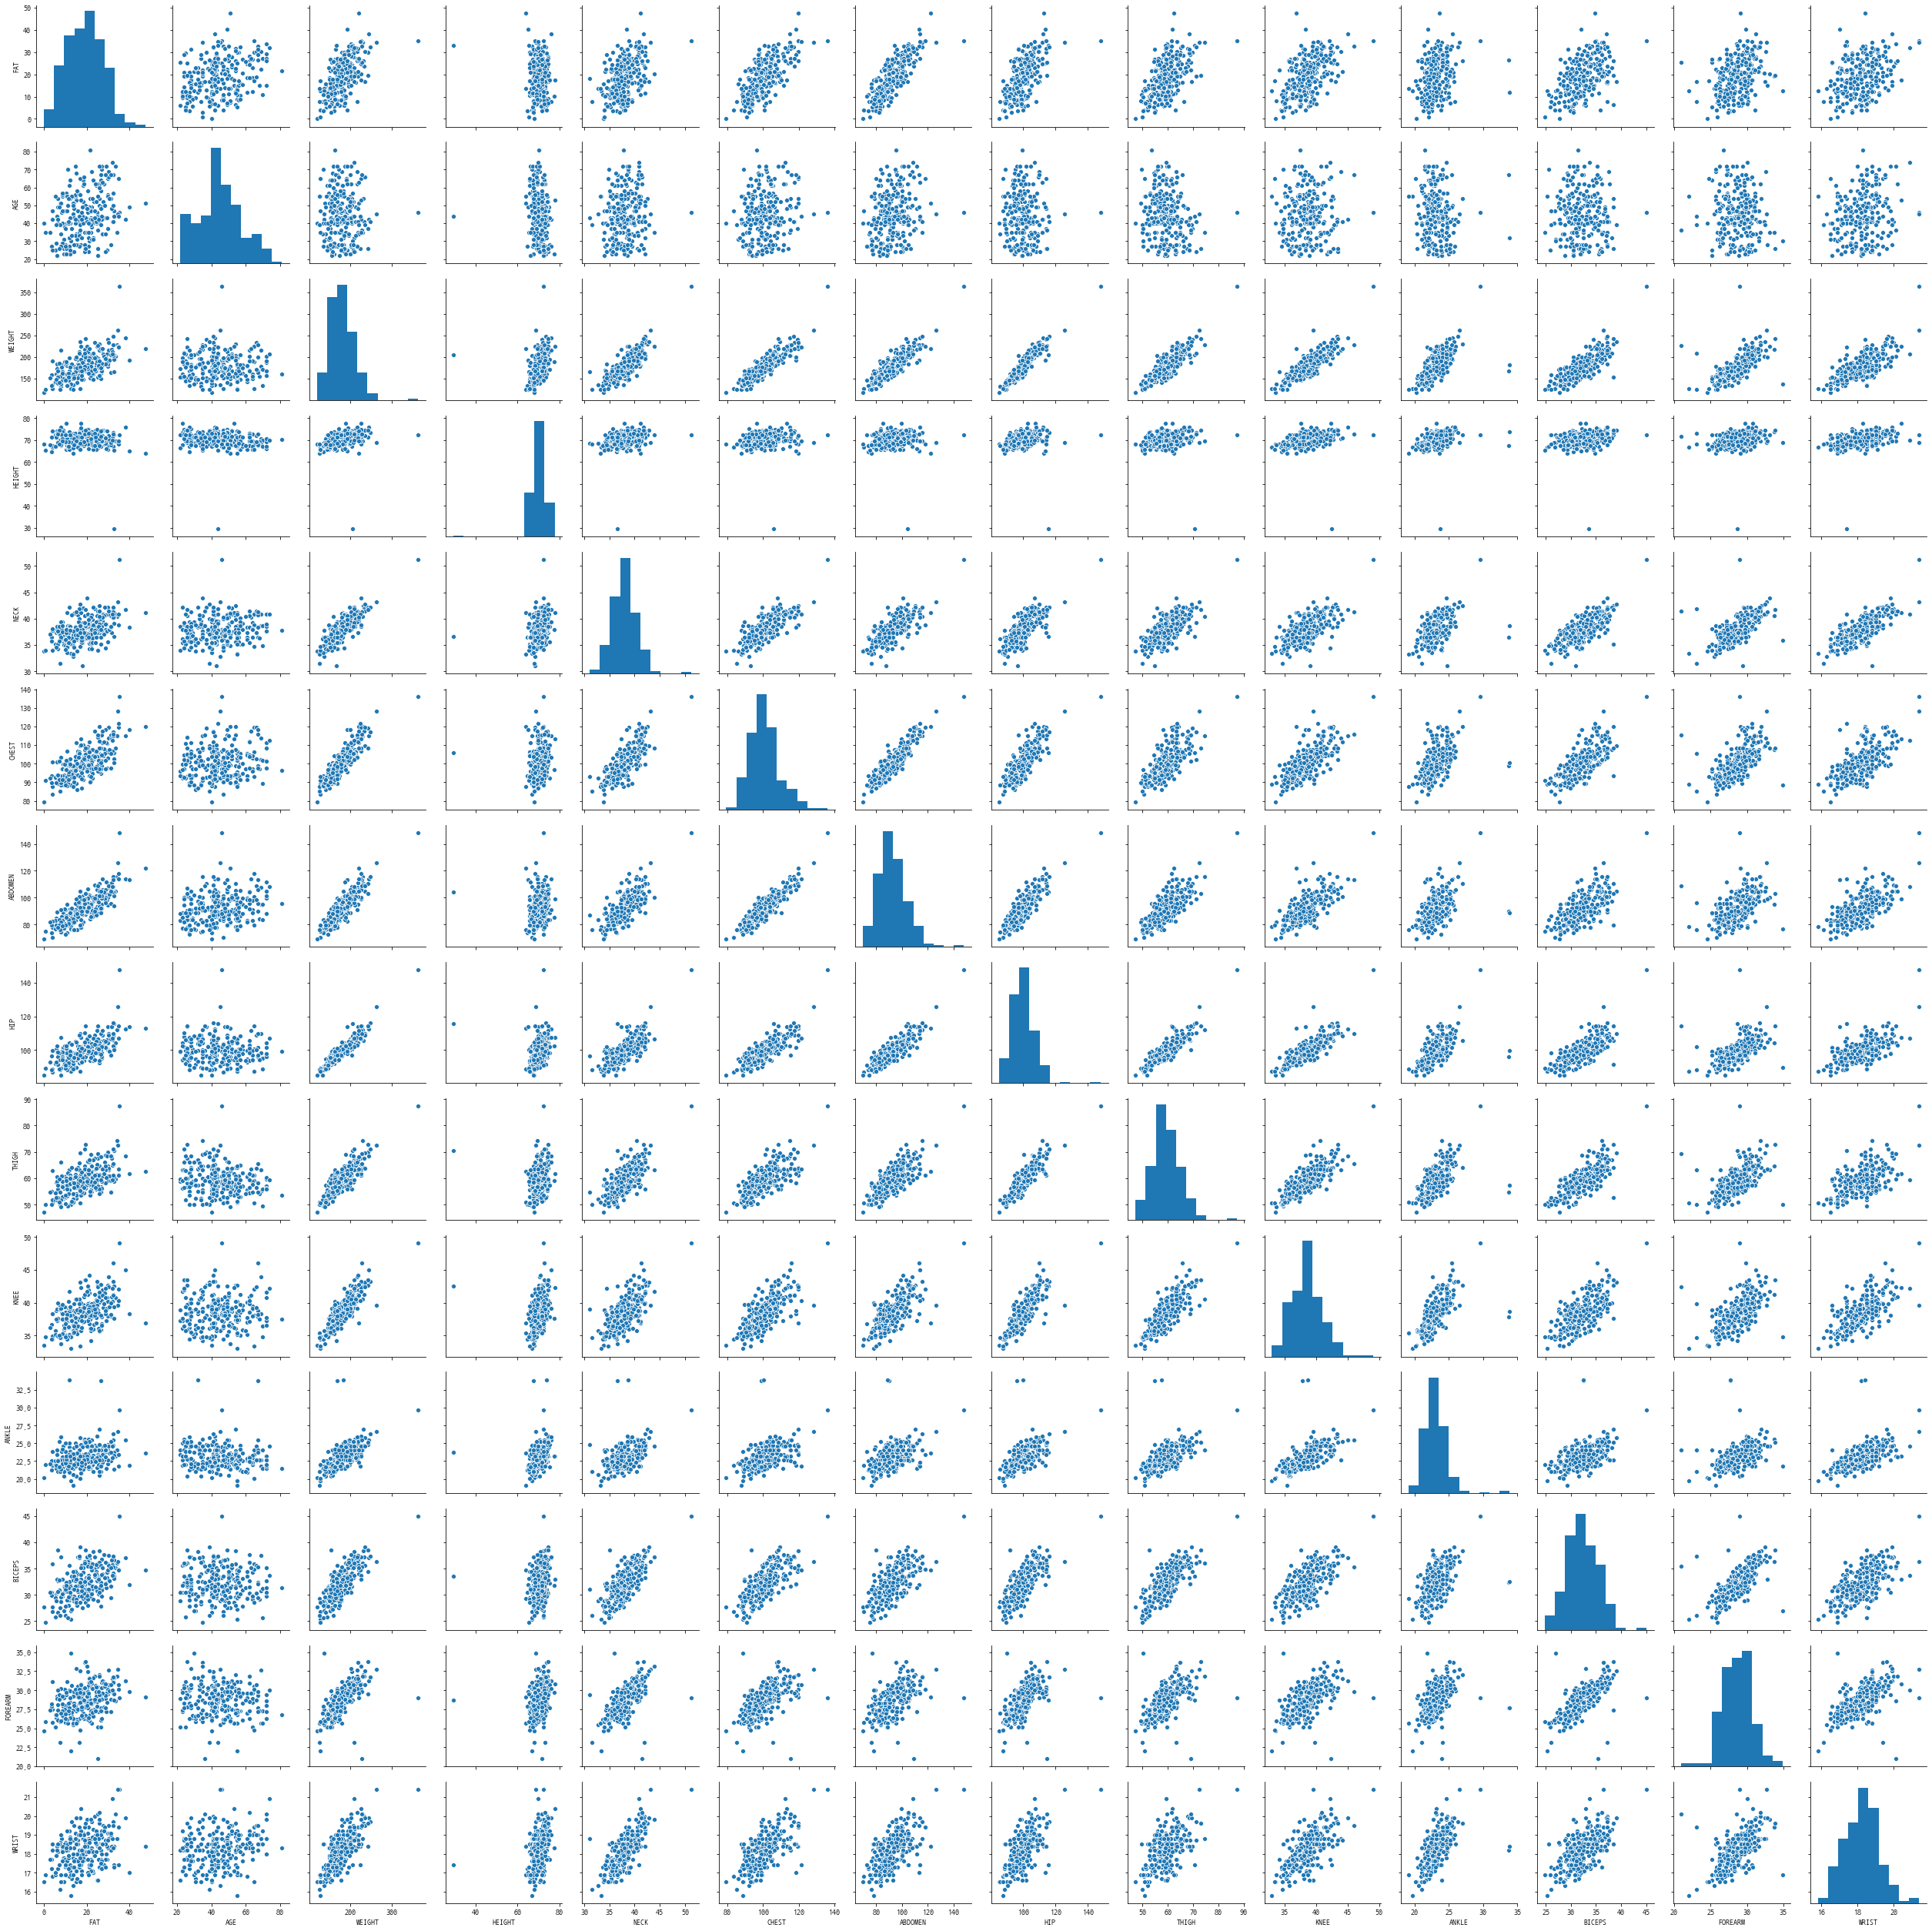

In [27]:
sns.pairplot(df)

In [28]:
df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


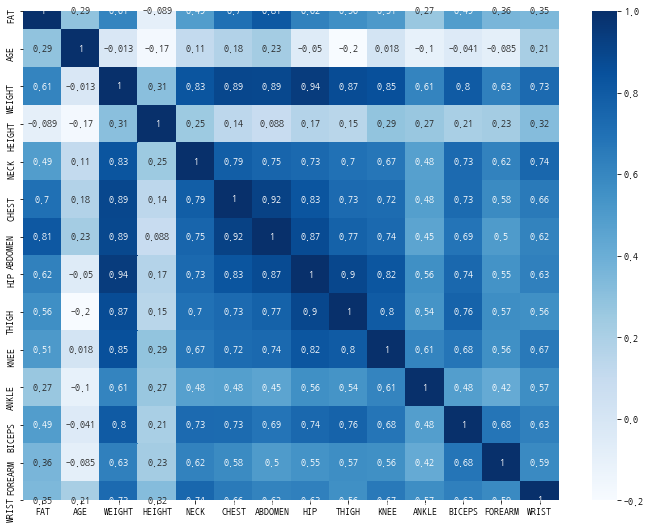

In [30]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(method = 'pearson').round(3), annot = True, cmap = 'Blues')

In [32]:
reg_model = smf.ols(formula = 'FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+\
                    THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST', data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           7.72e-64
Time:                        13:44:07   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.1885     17.349     -1.048      0.2

In [36]:
df_x = df.drop("FAT", axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
3,HEIGHT,1.675
10,ANKLE,1.908
12,FOREARM,2.192
1,AGE,2.250
13,WRIST,3.378
11,BICEPS,3.620
4,NECK,4.324
9,KNEE,4.612
8,THIGH,7.778
5,CHEST,9.461


In [37]:
# Weight 변수 제거
reg_model = smf.ols(formula = 'FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+\
                    THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST', data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     58.55
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.75e-64
Time:                        15:39:02   Log-Likelihood:                -719.69
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     239   BIC:                             1511.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5453      7.672      0.984      0.3

In [38]:
df_x = df.drop(["FAT","WEIGHT"], axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
2,HEIGHT,1.330
9,ANKLE,1.844
1,AGE,2.154
11,FOREARM,2.192
12,WRIST,3.309
10,BICEPS,3.507
3,NECK,3.956
8,KNEE,4.312
7,THIGH,7.753
4,CHEST,7.883


### 후진제거법

In [40]:
df_y = df['FAT']
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x, df_y)
#선택된 변수
selected_cols = df_x.columns[rfe.support_]
#제거된 변수 
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("removed Variables: {}".format(removed_cols))

Selected Variables: Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
removed Variables: Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


In [42]:
rfe_reg_model = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST", data = df)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        15:50:48   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [43]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)

df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]

df_rfe_vif.sort_values("VIF",inplace = True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
4,FOREARM,1.769
5,WRIST,2.430
1,NECK,3.565
3,HIP,4.662
2,ABDOMEN,4.818
0,const,509.235


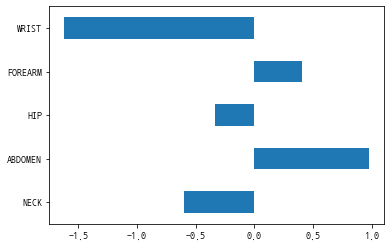

In [44]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

### 표준화 회귀계수를 이용한 변수 중요도 확인

In [46]:
scaler = StandardScaler()

cols = df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["FAT"]=df["FAT"]
reg_model_scaled = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST", data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.38e-68
Time:                        16:03:07   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.276     69.362      0.0

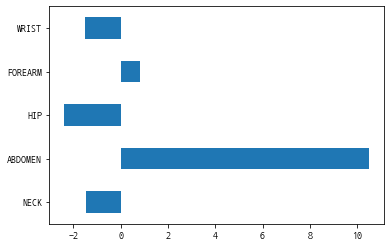

In [48]:
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_scaled_coef.plot.barh(y = "Coef", legend = False)

회귀계수의 방향은 동일하나 중요도 크기가 변함 <br>
복부둘레(ABBOMEN)가 가장 중요하고 손목 두께(WRIST)의 중요도는 줄어든 반면 엉덩이(HIP)변수의 중요도가 증가함

# 다중회귀 실습

In [91]:
df = pd.read_csv('DIABETES.csv', engine = 'python')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [152]:
df2 = pd.concat([df,pd.get_dummies(df['GENDER'],columns = ['GENDER1','GENDER2'])], axis = 1)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,1,2
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,0,1
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,1,0
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,0,1
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,1,0
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,1,0


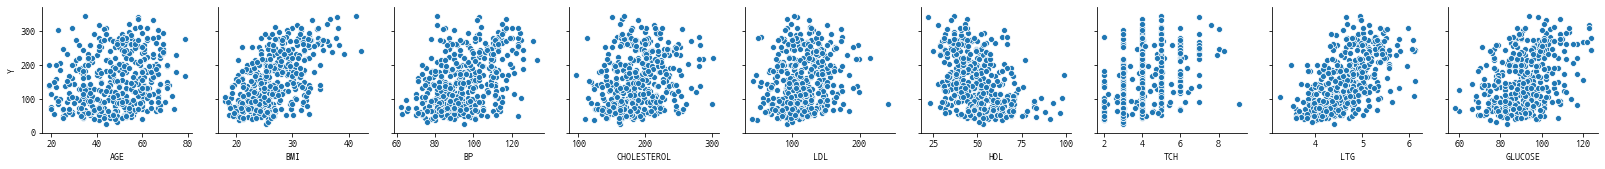

In [92]:
sns.pairplot(df, y_vars ="Y", x_vars = ['AGE','BMI','BP','CHOLESTEROL','LDL','HDL','TCH','LTG','GLUCOSE'])

In [93]:
reg_model = smf.ols(formula = 'Y~AGE+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE', data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     48.11
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           8.80e-60
Time:                        17:04:31   Log-Likelihood:                -2393.7
No. Observations:                 442   AIC:                             4807.
Df Residuals:                     432   BIC:                             4848.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -363.8987     68.142     -5.340      

In [94]:
df_x = df.drop(['Y','GENDER'], axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AGE,1.205
3,BP,1.408
9,GLUCOSE,1.477
2,BMI,1.479
7,TCH,8.834
8,LTG,10.075
6,HDL,15.369
5,LDL,39.123
4,CHOLESTEROL,59.063
0,const,677.323


In [95]:
reg_model = smf.ols(formula = 'Y~AGE+BMI+BP+LDL+HDL+TCH+LTG+GLUCOSE', data= df)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     53.54
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           4.68e-60
Time:                        17:04:31   Log-Likelihood:                -2395.2
No. Observations:                 442   AIC:                             4808.
Df Residuals:                     433   BIC:                             4845.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -267.5419     37.132     -7.205      0.0

In [96]:
df_x = df.drop(["Y","GENDER","CHOLESTEROL"], axis = 1)
df_x_const = add_constant(df_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]

df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

,variable,VIF
1,AGE,1.205
3,BP,1.406
2,BMI,1.473
8,GLUCOSE,1.476
7,LTG,2.147
4,LDL,2.926
5,HDL,3.616
6,TCH,7.783
0,const,200.278


In [97]:
#후진제거법
df_x = df.drop(["Y","GENDER"], axis = 1)
df_y = df['Y']
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_x, df_y)
#선택된 변수
selected_cols = df_x.columns[rfe.support_]
#제거된 변수 
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variables: {}".format(selected_cols))
print("removed Variables: {}".format(removed_cols))


Selected Variables: Index(['BMI', 'BP', 'CHOLESTEROL', 'TCH', 'LTG'], dtype='object')
removed Variables: Index(['AGE', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [127]:
rfe_reg_model = smf.ols(formula = 'Y~BMI+BP+CHOLESTEROL+TCH+LTG', data= df)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     86.44
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           5.32e-63
Time:                        17:20:50   Log-Likelihood:                -2394.9
No. Observations:                 442   AIC:                             4802.
Df Residuals:                     436   BIC:                             4826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -305.1079     27.522    -11.086      

In [128]:
rfe_reg_result.params.values[1:]

array([ 6.2048715 ,  0.95907904, -0.35497163,  6.2654005 , 52.66646656])

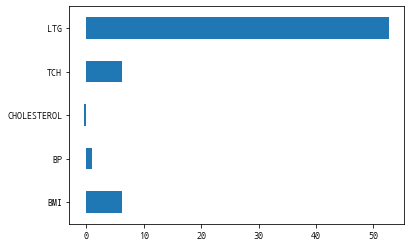

In [129]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

In [133]:
df_x = df.drop(["Y","GENDER"], axis = 1)
scaler = StandardScaler()

cols = df_x.columns

np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns = cols)

df_scaled["Y"]=df["Y"]
reg_model_scaled = smf.ols(formula = 'Y~BMI+BP+CHOLESTEROL+TCH+LTG', data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     86.44
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           5.32e-63
Time:                        17:21:46   Log-Likelihood:                -2394.9
No. Observations:                 442   AIC:                             4802.
Df Residuals:                     436   BIC:                             4826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     152.1335      2.613     58.212      

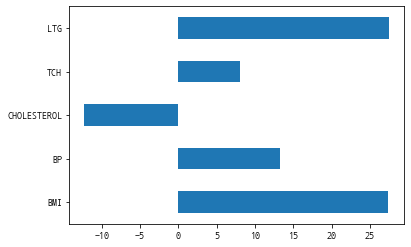

In [134]:
df_reg_scaled_coef = pd.DataFrame({"Coef":reg_result_scaled.params.values[1:]}, index = selected_cols)
df_reg_scaled_coef.plot.barh(y = "Coef", legend = False)